## 聚类

$err = \sum_{x \in o_1}||x_i - c_1||^2$

In [6]:
using LinearAlgebra
avg(x) = (ones(length(x)) / length(x))' * x
Jclust(x, reps, assigment) = 
    avg([norm(x[i] - reps[assigment[i]])^2 for i=1:length(x)])

Jclust (generic function with 1 method)

In [7]:
x = [[0, 1], [1, 0], [-1, 1]]

3-element Array{Array{Int64,1},1}:
 [0, 1] 
 [1, 0] 
 [-1, 1]

In [8]:
reps = [[1, 1], [0, 0]]

2-element Array{Array{Int64,1},1}:
 [1, 1]
 [0, 0]

In [9]:
assignment = [1, 2, 1]

3-element Array{Int64,1}:
 1
 2
 1

In [10]:
Jclust(x, reps, assigment)

2.0

In [62]:
# 实现一个k-means

function kmeans(x, k; maxiters=100, tol=1e-6)
    N = length(x)
    n = length(x[1])
    distances = zeros(N) # 用来存储每个点距离最近中心点的距离
    
    reps = [zeros(n) for j=1:k] # 初始化k个中心点
    
    assignment = [rand(1:k) for i in 1:N] # 随机给每个向量分一个类
    
    Jprevious = Inf 
    for iter = 1:maxiters
        for j = 1:k
            group = [i for i=1:N if assignment[i] == j]
            reps[j] = sum(x[group]) / length(group)  #定中心          
        end
        for i in 1:N
            (distances[i], assignment[i]) = 
                    findmin([norm(x[i] - reps[j]) for j in 1:k]); # 找最小距离
        end
        J = norm(distances)^2 / N  # 误差值
        println("Iteration ", iter, ": Jclust = ", J, ".")
        if iter > 1 && abs(J - Jprevious) < tol * J
            return assignment, reps
        end
        Jprevious = J
    end
end
    
                    
        
    

kmeans (generic function with 1 method)

In [63]:
X = vcat([0.3*randn(2) for i=1:100],
    [[1, 1] + 0.3*randn(2) for i=1:100],
    [[1, -1] + 0.3*randn(2) for i=1:100]
)

300-element Array{Array{Float64,1},1}:
 [-0.329724, 0.0128671]
 [0.496242, 0.253745]  
 [0.227236, -0.213057] 
 [0.26507, 0.190164]   
 [-0.0986612, 0.128087]
 [-0.0521468, 0.346849]
 [0.523296, -0.128582] 
 [-0.419112, 0.0701206]
 [0.135608, -0.38719]  
 [0.0188375, -0.81641] 
 [-0.23979, 0.171167]  
 [0.224783, 0.339862]  
 [-0.114013, 0.137751] 
 ⋮                     
 [0.851372, -1.28707]  
 [1.14061, -1.19258]   
 [0.776736, -0.987889] 
 [1.02999, -0.72646]   
 [1.42299, -1.75552]   
 [1.02145, -1.14231]   
 [1.01122, -0.919623]  
 [1.06603, -1.42037]   
 [1.02295, -1.15346]   
 [1.08762, -1.73352]   
 [1.76256, -0.840189]  
 [0.795483, -1.0248]   

In [64]:
using Plots

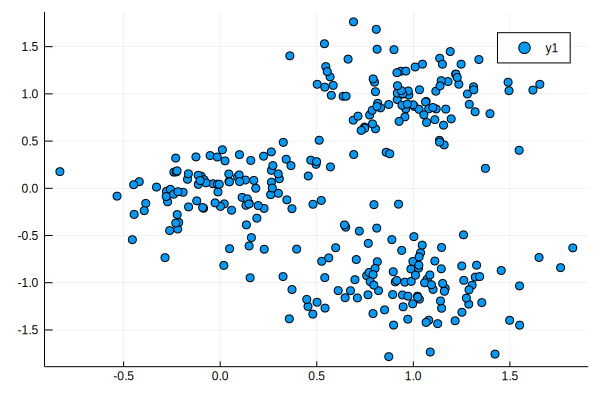

In [65]:
scatter([x[1] for x in X], [x[2] for x in X])

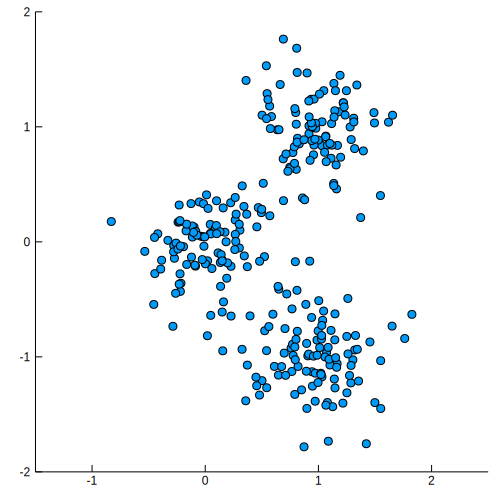

In [66]:
plot!(legend=false, grid=false, size=(500, 500),
xlims=(-1.5, 2.5), ylims=(-2, 2))

In [67]:
assignment, reps = kmeans(X, 3)

Iteration 1: Jclust = 0.9140020031371231.
Iteration 2: Jclust = 0.4350225017484941.
Iteration 3: Jclust = 0.27343085965262454.
Iteration 4: Jclust = 0.17196039005480354.
Iteration 5: Jclust = 0.16442064208575735.
Iteration 6: Jclust = 0.16418981018807904.
Iteration 7: Jclust = 0.16418981018807904.


([3, 3, 3, 3, 3, 3, 3, 3, 3, 3  …  2, 2, 2, 2, 2, 2, 2, 2, 2, 2], Array{Float64,1}[[0.977679, 0.970489], [0.962578, -0.99779], [0.0182973, -0.0292661]])

In [68]:
k=3
N = length(X)
groups = [[X[i] for i=1:N if assignment[i] == j] for j in 1:k]

3-element Array{Array{Array{Float64,1},1},1}:
 [[0.935724, 1.23975], [0.955016, 1.00079], [1.06636, 0.919271], [1.19619, 0.735566], [0.859396, 0.381841], [0.815604, 0.900463], [1.11157, 0.727039], [1.04726, 1.31453], [0.812371, 1.47253], [1.6192, 1.04023]  …  [0.915105, 1.22459], [0.54166, 1.07122], [1.13576, 0.488971], [0.926334, 0.708823], [1.65501, 1.10118], [0.651751, 0.975408], [0.917933, 1.08652], [0.872666, 0.88746], [1.22739, 1.17317], [0.804022, 1.02283]]                                          
 [[0.649947, -0.411474], [0.325475, -0.934492], [0.758485, -0.924605], [1.32092, -0.940412], [1.34347, -0.934416], [1.287, -1.22667], [0.813323, -0.777618], [0.943589, -1.12963], [1.30445, -1.02598], [0.90647, -0.991335]  …  [0.776736, -0.987889], [1.02999, -0.72646], [1.42299, -1.75552], [1.02145, -1.14231], [1.01122, -0.919623], [1.06603, -1.42037], [1.02295, -1.15346], [1.08762, -1.73352], [1.76256, -0.840189], [0.795483, -1.0248]]                          
 [[-0.329724, 0.0128671]

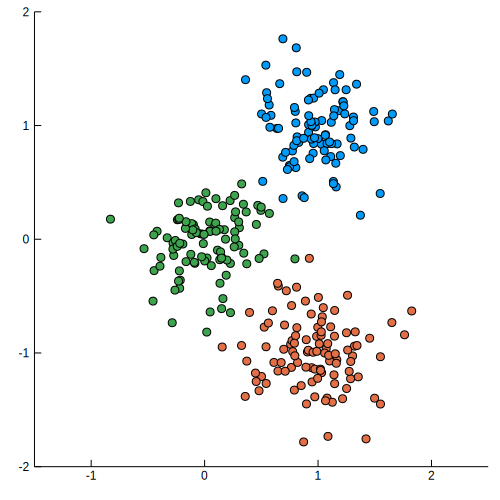

In [69]:
scatter([c[1] for c in groups[1]], [c[2] for c in groups[1]])
scatter!([c[1] for c in groups[2]], [c[2] for c in groups[2]])
scatter!([c[1] for c in groups[3]], [c[2] for c in groups[3]])

plot!(legend=false, grid=false, size=(500, 500),
xlims=(-1.5, 2.5), ylims=(-2, 2))
